In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
# For splitting and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import  Pipeline
# to Evaluate models  
from sklearn.metrics import confusion_matrix , accuracy_score

In [91]:
df = pd.read_csv('diabetes.csv')

In [92]:
def show_df(df):   #function to show information about data
    
    print('shape'.center(30,'_'))
    display(df.shape)
    
    print('head'.center(30,'_'))
    display(df.head())
    
    print('tail'.center(30,'_'))
    display(df.tail())
    
    print('info'.center(30,'_')+'\n')
    display(df.info())
    
    print('describe'.center(30,'_'))
    display(df.describe().T)
  
show_df(df)

____________shape_____________


(768, 9)

_____________head_____________


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0 33.60   
1            1       85             66             29        0 26.60   
2            8      183             64              0        0 23.30   
3            1       89             66             23       94 28.10   
4            0      137             40             35      168 43.10   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   21        0  
4                      2.29   33        1

_____________tail_____________


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180 32.90   
764            2      122             70             27        0 36.80   
765            5      121             72             23      112 26.20   
766            1      126             60              0        0 30.10   
767            1       93             70             31        0 30.40   

     DiabetesPedigreeFunction  Age  Outcome  
763                      0.17   63        0  
764                      0.34   27        0  
765                      0.24   30        0  
766                      0.35   47        1  
767                      0.32   23        0

_____________info_____________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

___________describe___________


count   mean    std   min   25%    50%    75%    max
Pregnancies              768.00   3.85   3.37  0.00  1.00   3.00   6.00  17.00
Glucose                  768.00 120.89  31.97  0.00 99.00 117.00 140.25 199.00
BloodPressure            768.00  69.11  19.36  0.00 62.00  72.00  80.00 122.00
SkinThickness            768.00  20.54  15.95  0.00  0.00  23.00  32.00  99.00
Insulin                  768.00  79.80 115.24  0.00  0.00  30.50 127.25 846.00
BMI                      768.00  31.99   7.88  0.00 27.30  32.00  36.60  67.10
DiabetesPedigreeFunction 768.00   0.47   0.33  0.08  0.24   0.37   0.63   2.42
Age                      768.00  33.24  11.76 21.00 24.00  29.00  41.00  81.00
Outcome                  768.00   0.35   0.48  0.00  0.00   0.00   1.00   1.00

In [93]:
def check(df):
    
    #function to check data have null and  duplicated values or no
    
    print('Number of null values'.center(30,'_'))
    print(df.isnull().sum())
    print(50*'_')
    print('\n'+'Number of duplicated values'.center(30,'_')+'\n')
    print(f'--------{df.duplicated().sum()}')
check(df)

____Number of null values_____
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
__________________________________________________

_Number of duplicated values__

--------0


# `Insights` 
- 1 all data is numeric 
- 2> the data is un balanced 
- 3> data doesn't have null values and duplicated data 

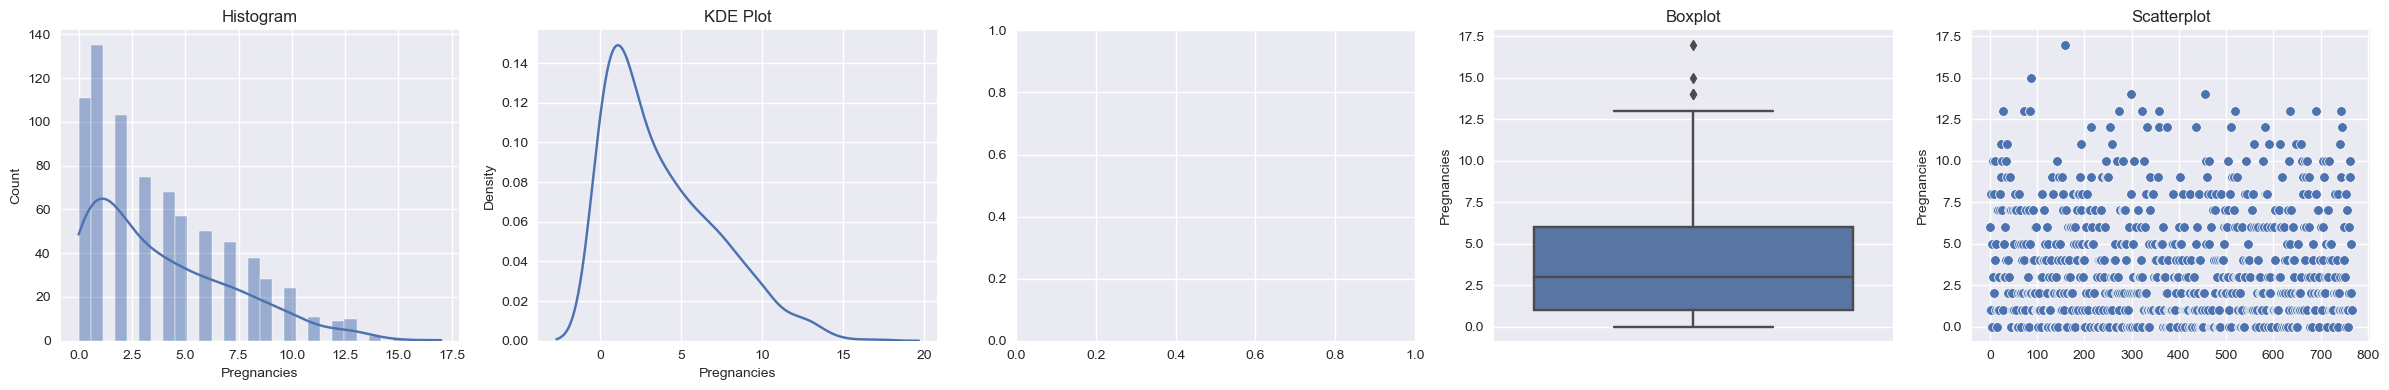

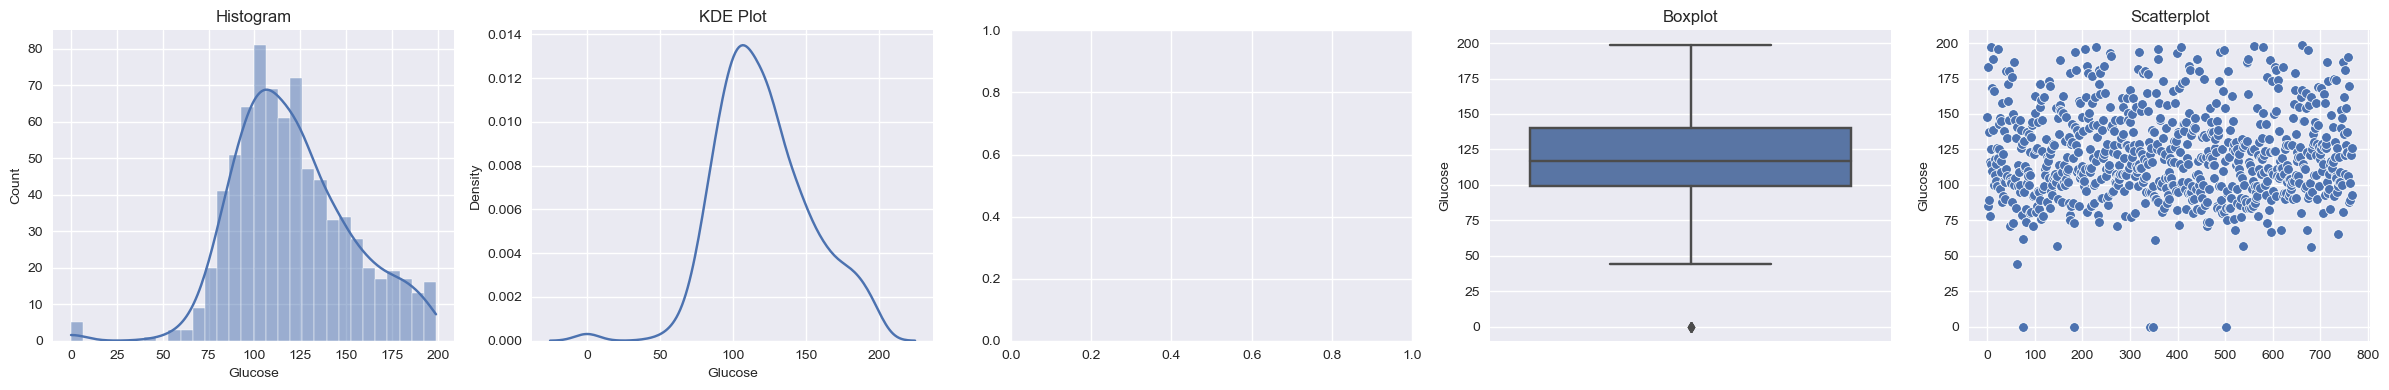

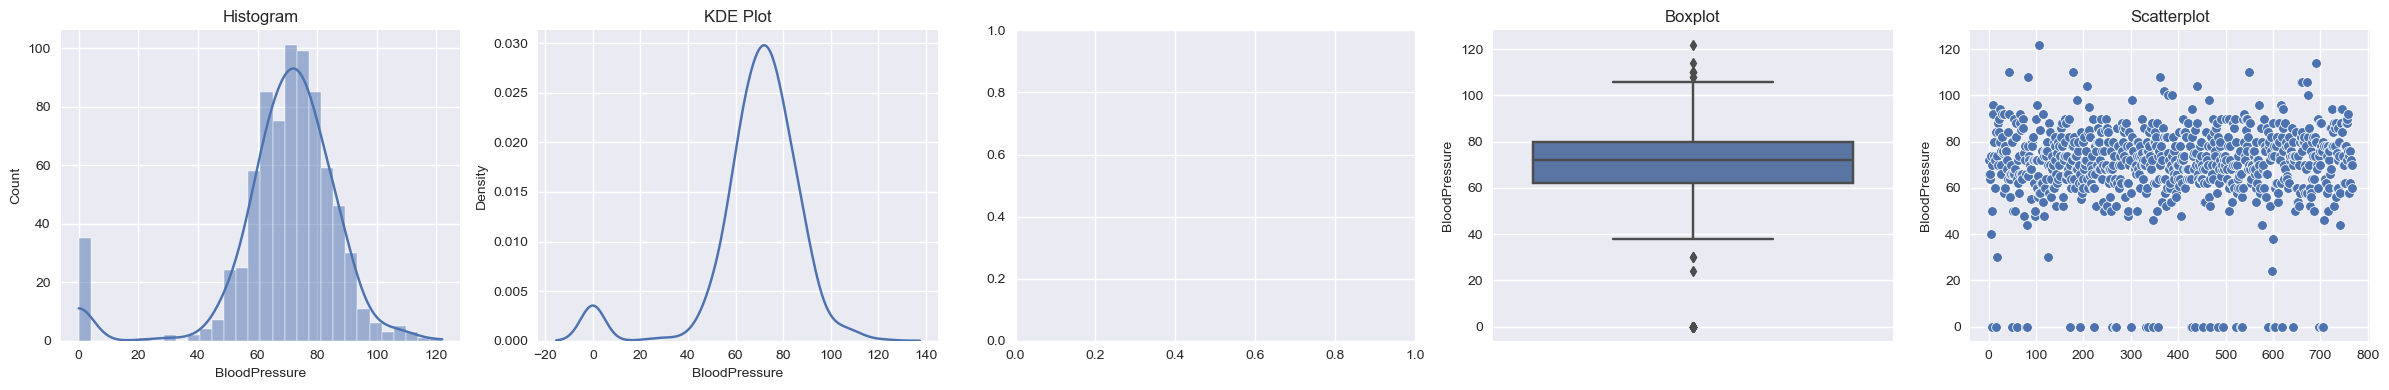

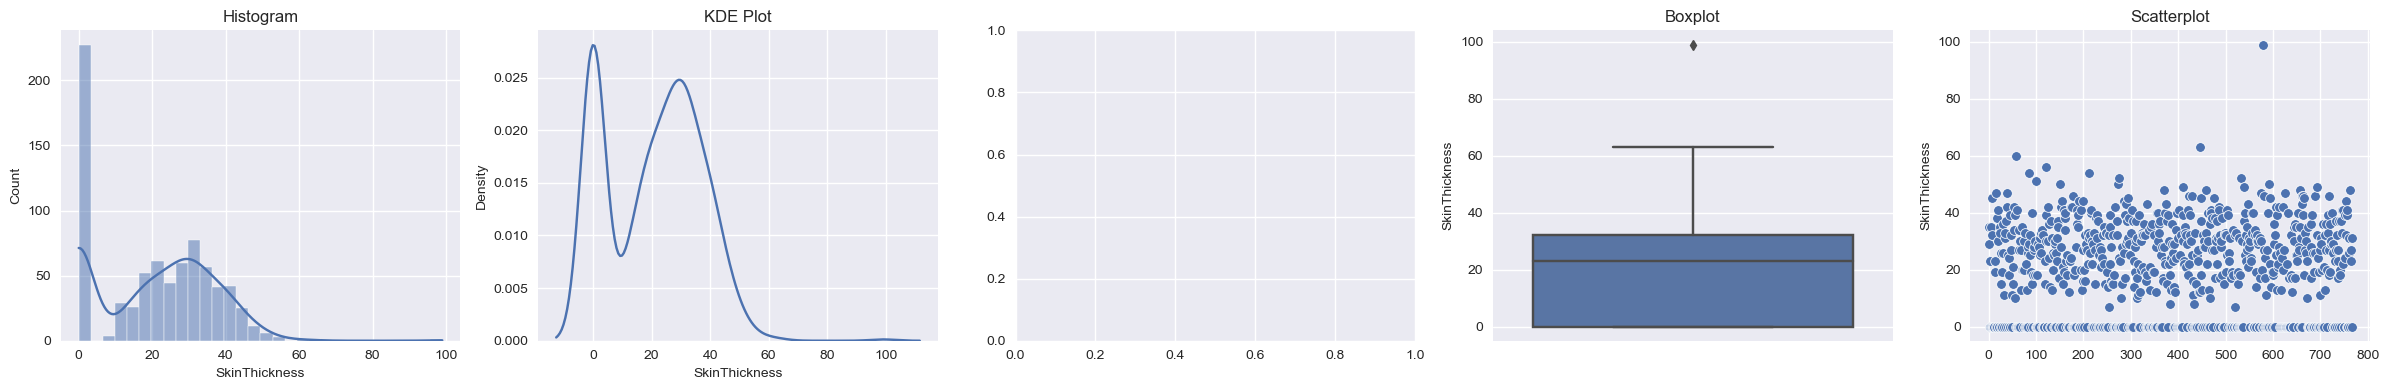

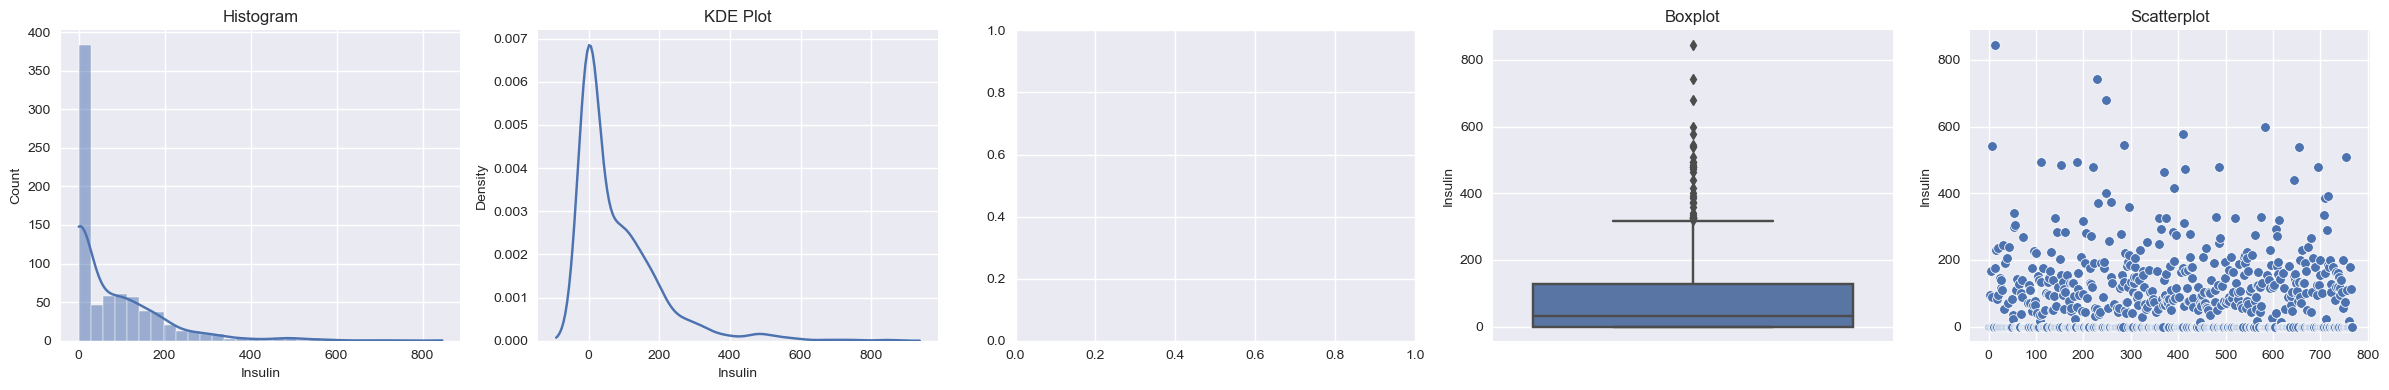

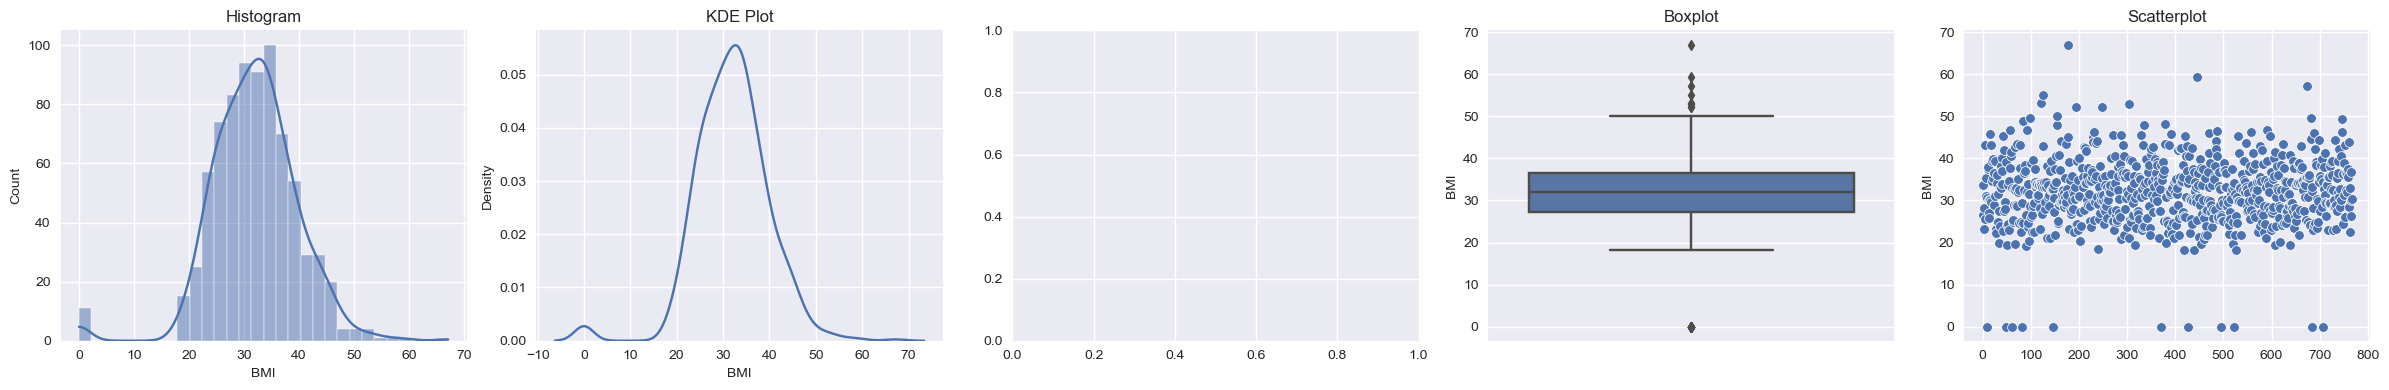

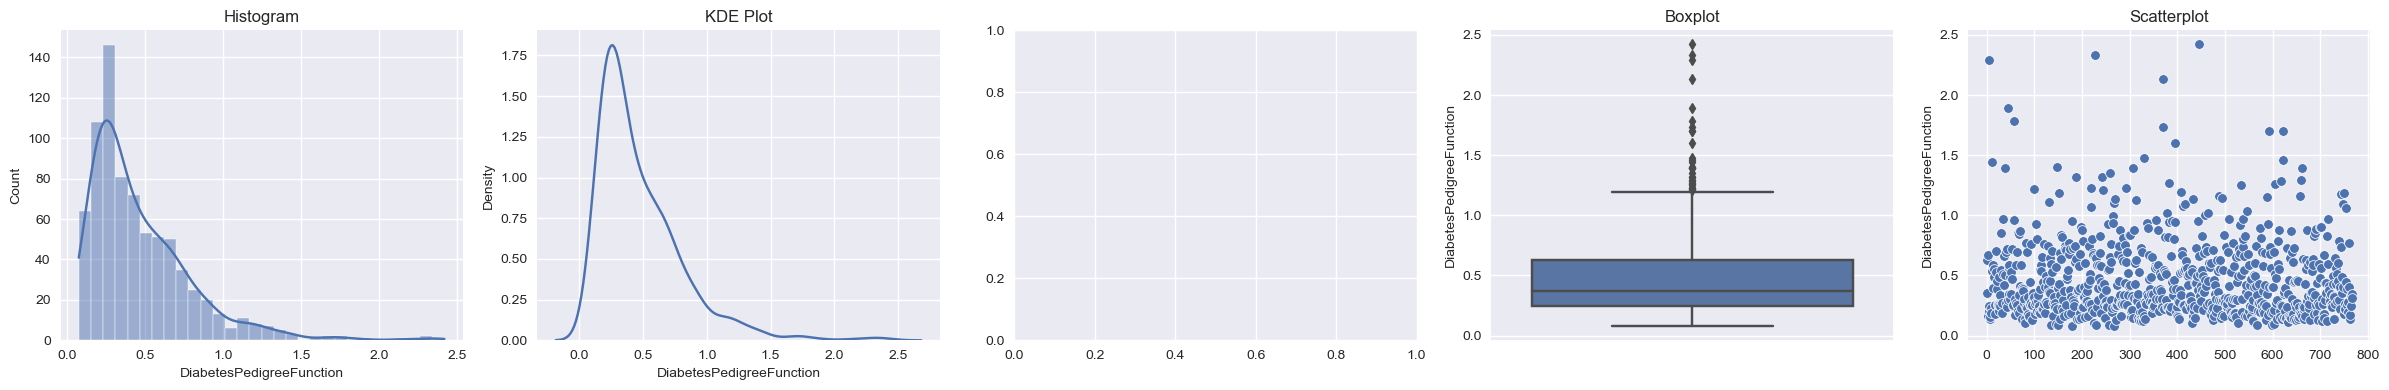

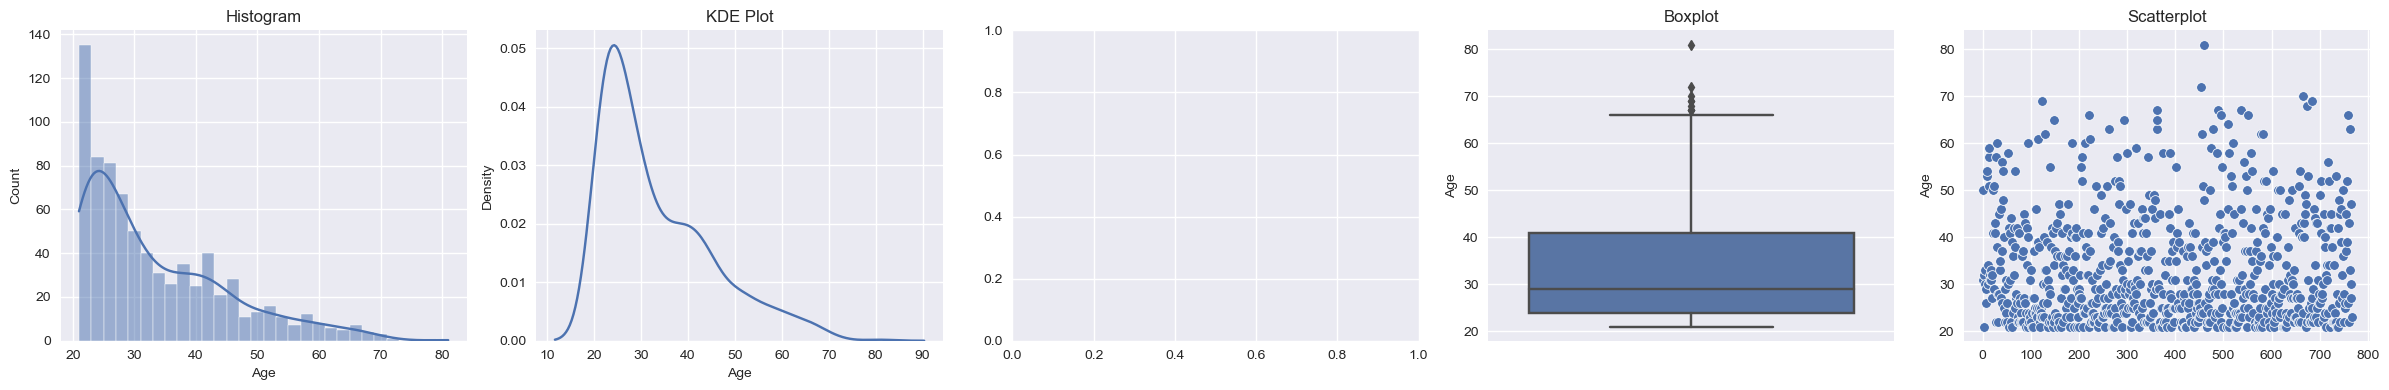

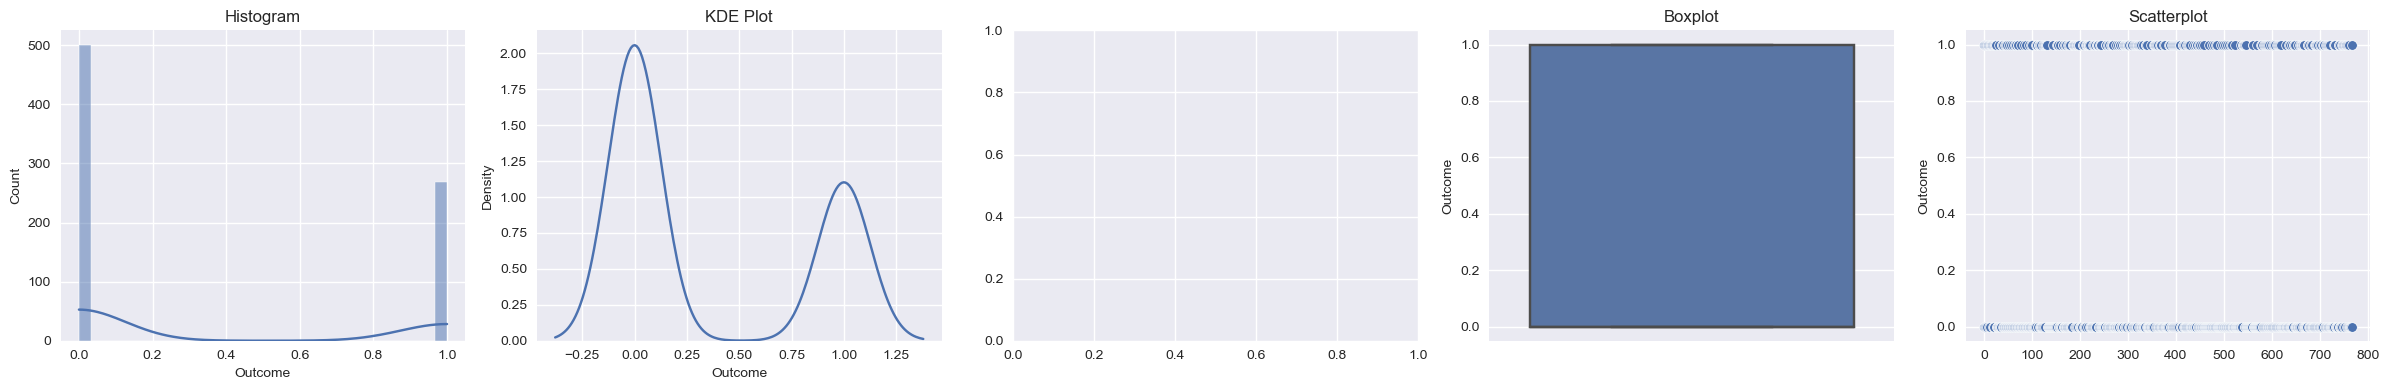

In [7]:
def plots(df, col):
  #  if df[col].dtype != object:
        # define figure size
        fig, ax = plt.subplots(1, 5, figsize=(24, 4))

        # histogram
        sns.histplot(df[col], bins=30, kde=True, ax=ax[0])
        ax[0].set_title('Histogram')

        # KDE plot
        sns.kdeplot(df[col], ax=ax[1])
        ax[1].set_title('KDE Plot')

        # boxplot
        sns.boxplot(y=df[col], ax=ax[3])
        ax[3].set_title('Boxplot')

        # scatterplot
        sns.scatterplot(x=df.index, y=df[col], ax=ax[4])
        ax[4].set_title('Scatterplot')

        plt.tight_layout()
        plt.show()

for col in df.columns:
    plots(df ,col)

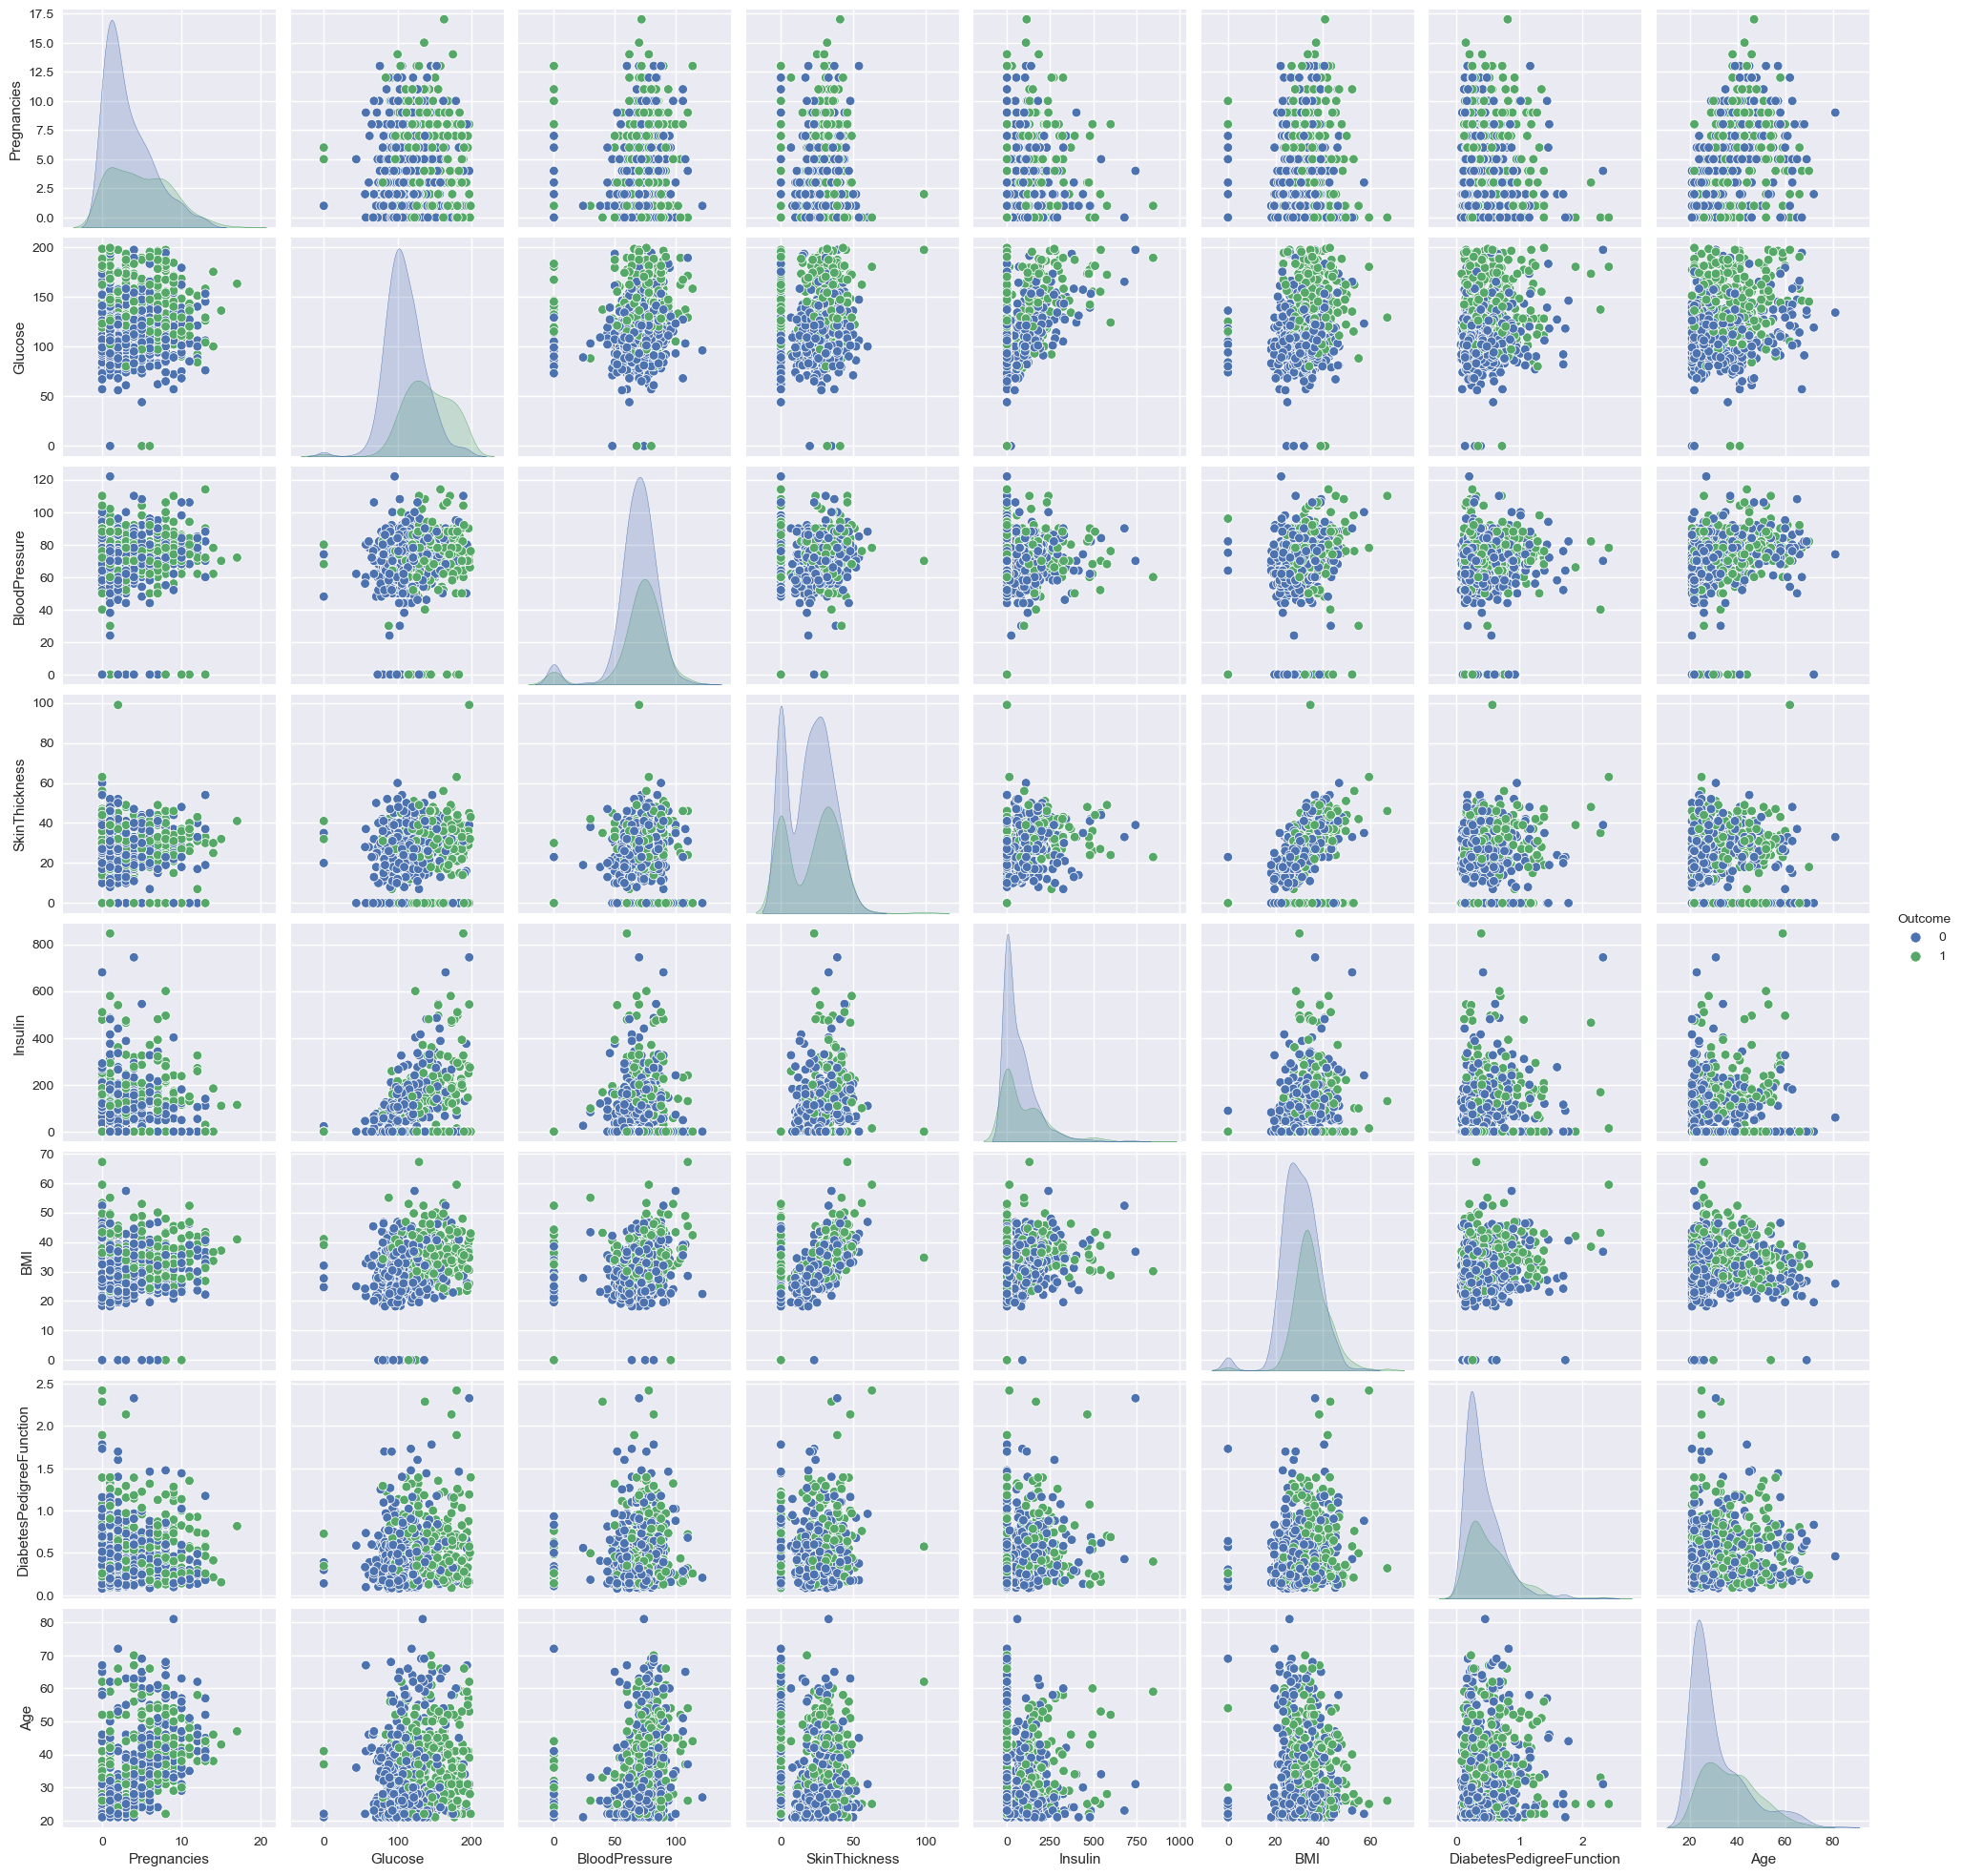

In [6]:
sns.pairplot(hue='Outcome',data=df)

<Axes: xlabel='Outcome', ylabel='count'>

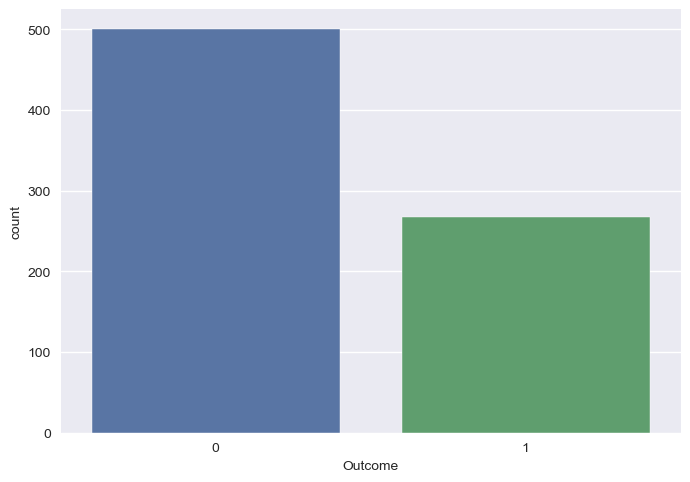

In [12]:
sns.countplot(x="Outcome",data=df)

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
cols = ["BloodPressure","SkinThickness","BMI"]
df[cols] = df[cols].replace(0,np.nan)

In [94]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
#for col in cols:
  #  df[col] = df[col].fillna(df[col].median())

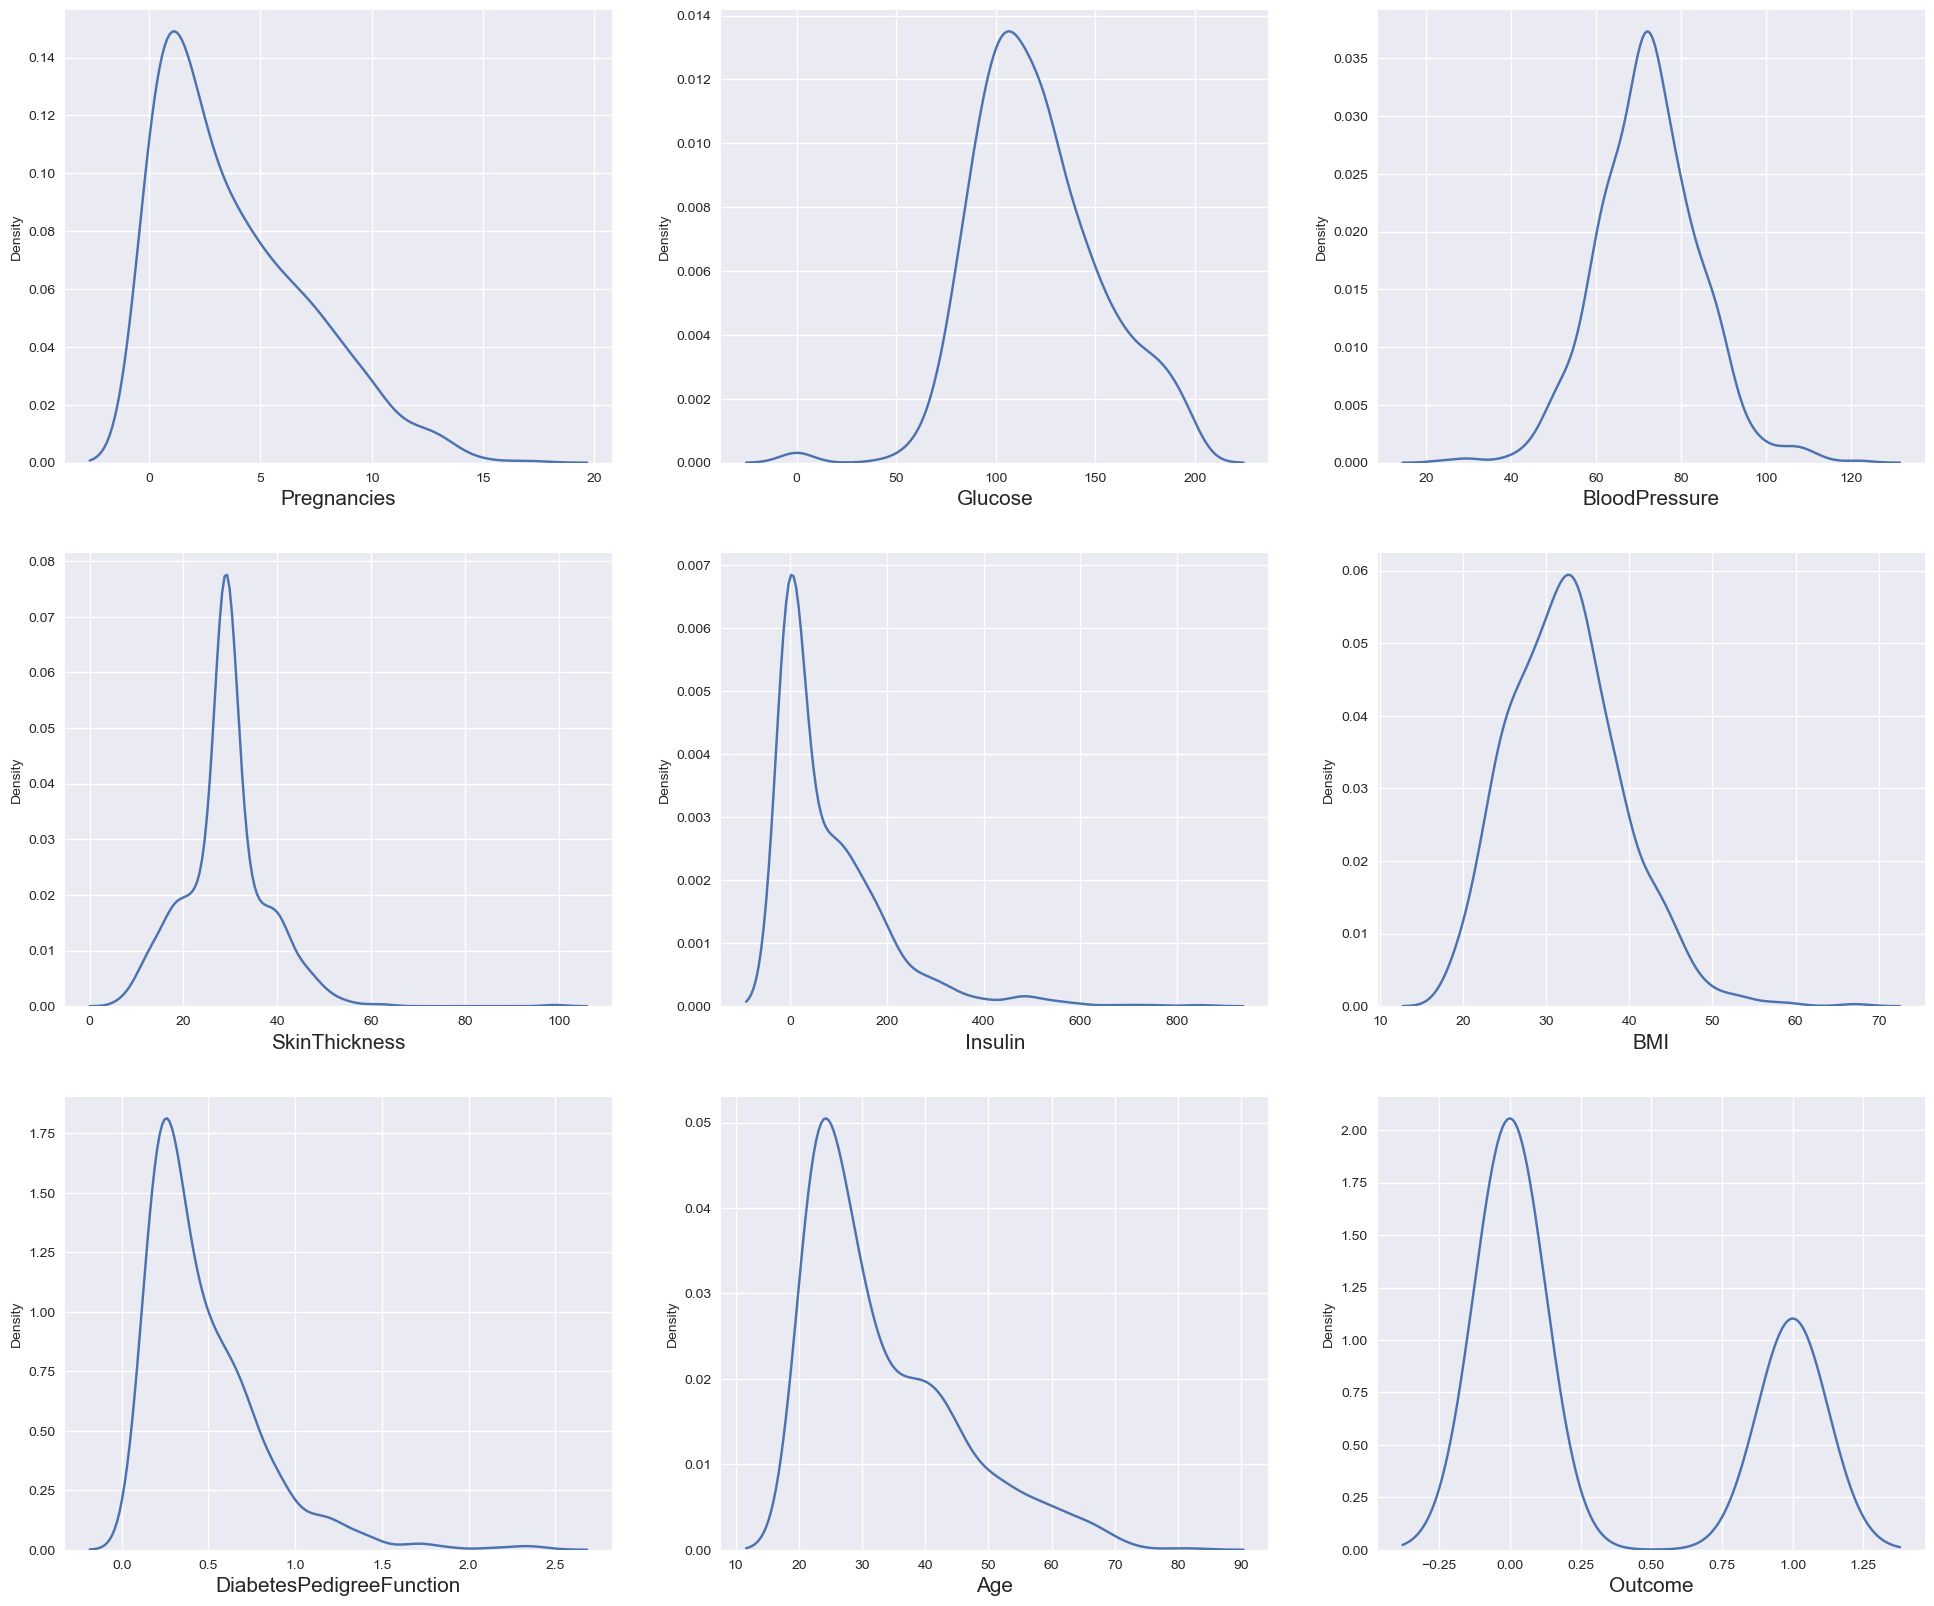

In [17]:
plt.figure(figsize=(24,20))
for i,col in enumerate(df.columns):
        plt.subplot(3,3,i+1)
        sns.kdeplot(x=df[col])
        plt.xlabel(col, fontsize=15)
        plt.xticks(fontsize=10)

In [19]:
col_num = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

In [57]:
def detect_outliers(df):#to deal with outliers 
        #if df[col].dtype != object:
            for col in col_num:
                q1 = df[col].quantile(0.25)
                q3 = df[col].quantile(0.75)
                iqr = q3 - q1
                fence_low = q1 - (1.5*iqr)
                fence_high = q3 + (1.5*iqr)
                if col in col_num:
                    df.loc[(df[col] < fence_low),col] = fence_low
                    df.loc[(df[col] > fence_high),col] = fence_high
detect_outliers(df)

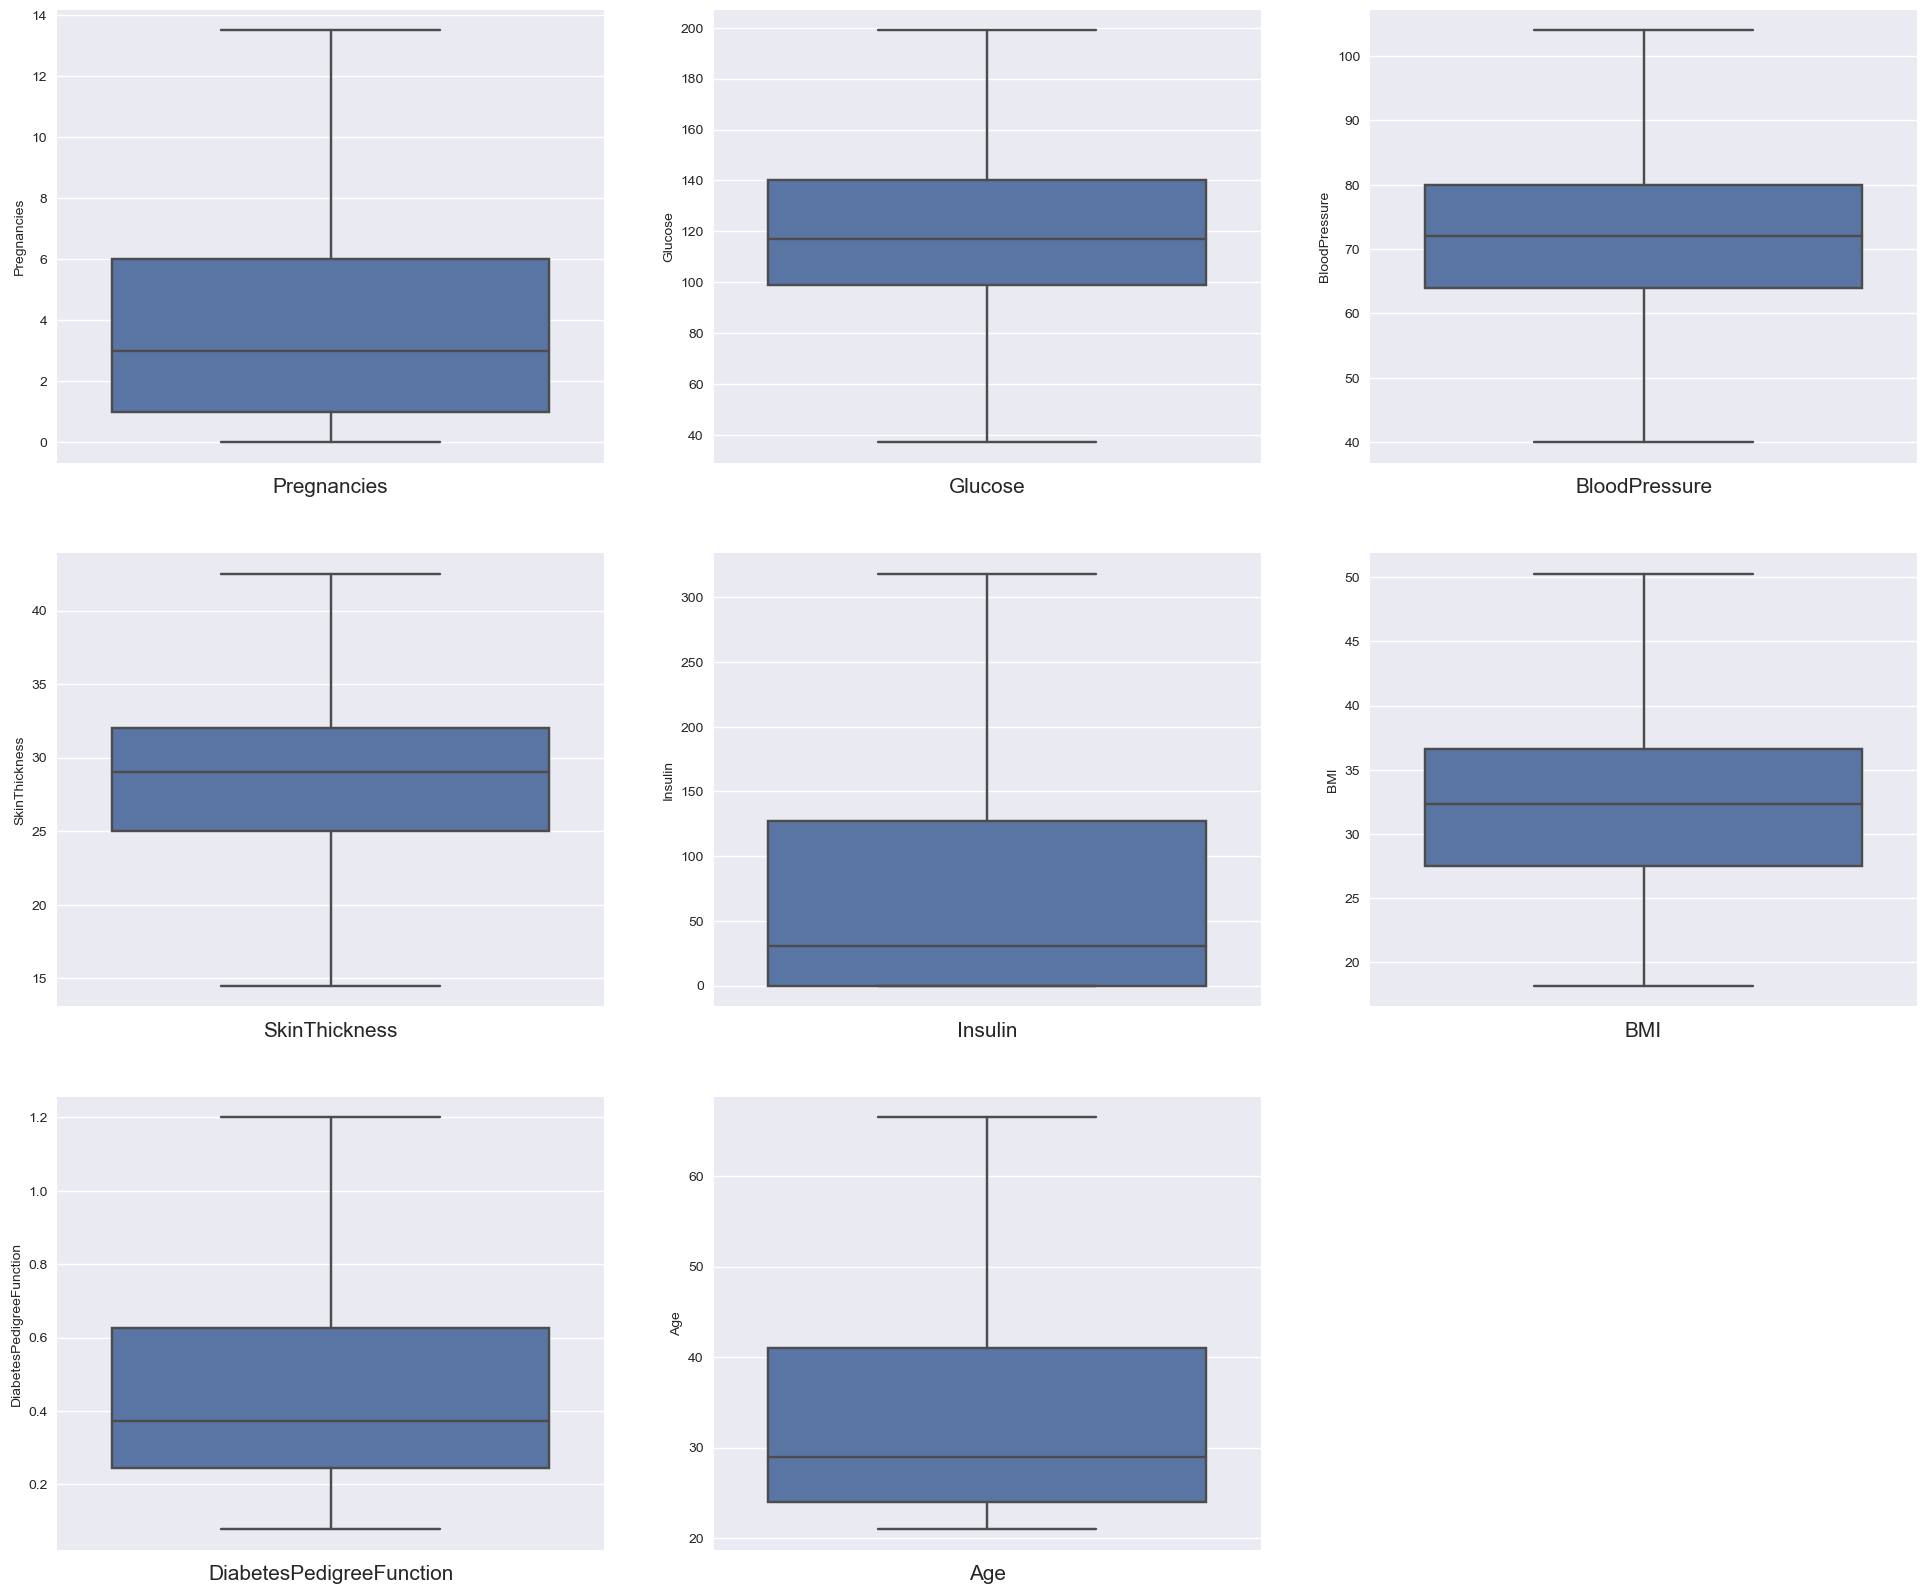

In [58]:
plt.figure(figsize=(24,20))
for i,col in enumerate(col_num):
        plt.subplot(3,3,i+1)
        sns.boxplot(y=df[col])
        plt.xlabel(col, fontsize=15)
        plt.xticks(fontsize=10)

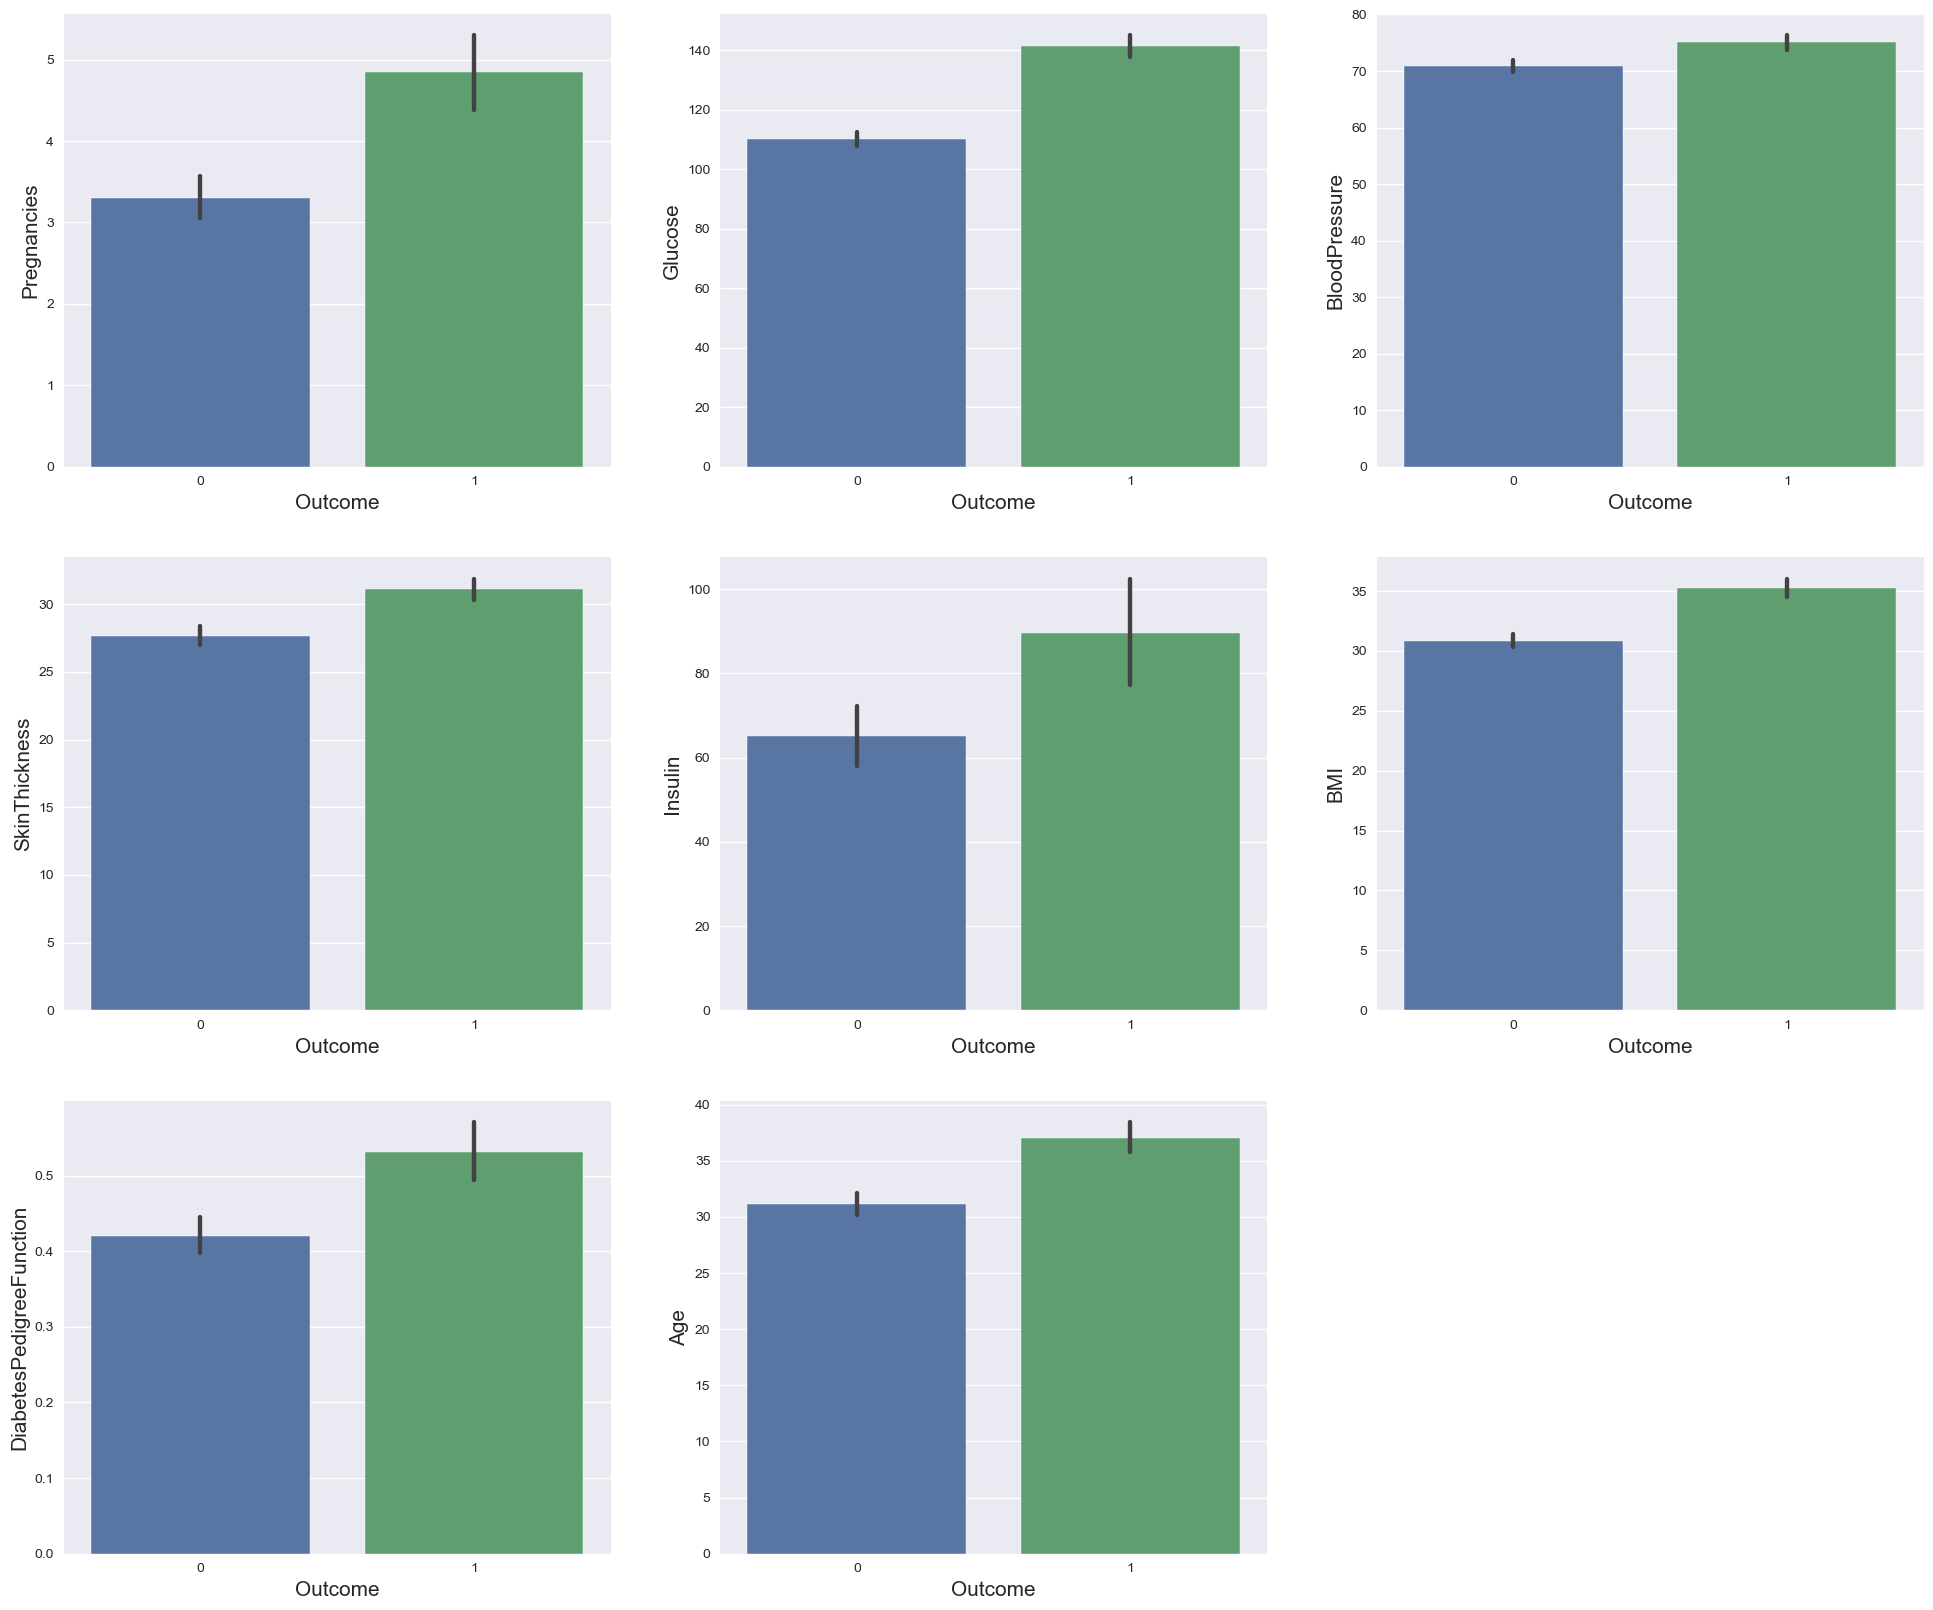

In [59]:
plt.figure(figsize=(24,20))
for i,col in enumerate(col_num):
        plt.subplot(3,3,i+1)
        sns.barplot(data=df,x="Outcome",y=col)
        plt.xlabel("Outcome", fontsize=15)
        plt.xticks(fontsize=10)
        plt.ylabel(col,fontsize=15)
        plt.yticks(fontsize=10)

<Axes: >

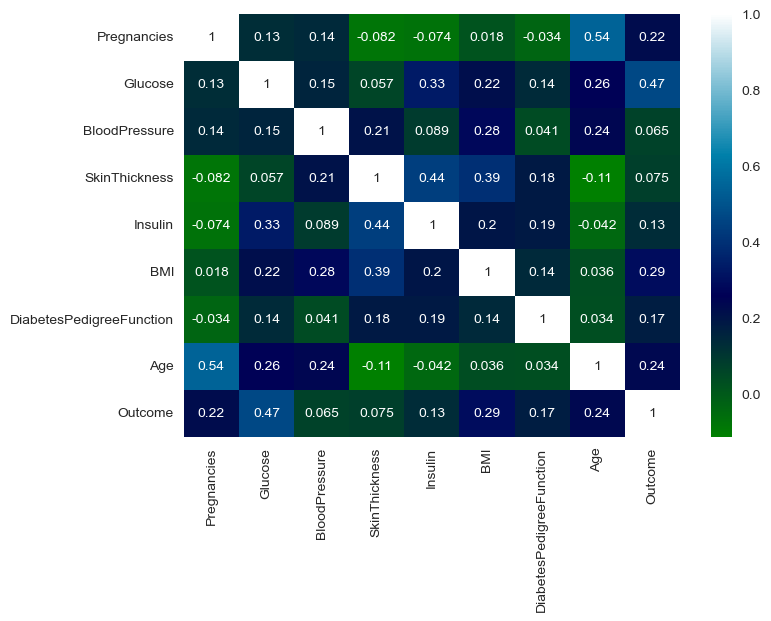

In [95]:
sns.heatmap(df.corr(),annot = True , cmap= 'ocean' )

# spliting data

In [96]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)

In [98]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# modeling

# LogisticRegression

In [99]:
lg = LogisticRegression()

In [100]:
lg.fit(x_train,y_train)

LogisticRegression()

In [101]:
y_pred = lg.predict(x_test)

In [102]:
accuracy_score(y_test,y_pred)

0.7792207792207793

In [103]:
l = confusion_matrix(y_test,y_pred)

<Axes: >

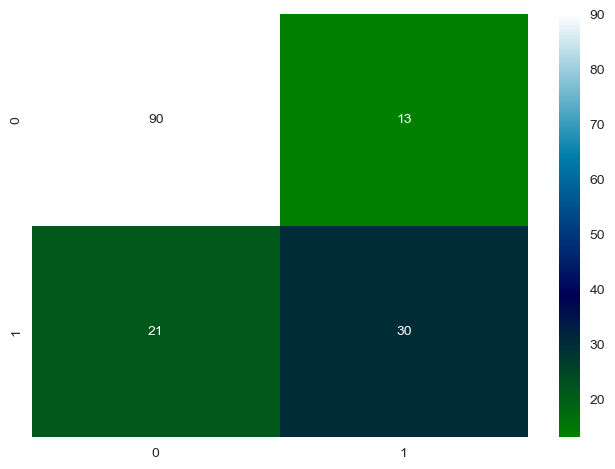

In [104]:
sns.heatmap(l,annot=True ,cmap="ocean")

In [105]:

lg_scores = cross_val_score(lg, x_train, y_train, scoring='accuracy'  , cv=10)
lg_scores.mean()

0.7703067160232682

# KNN

In [71]:
knn = KNeighborsClassifier()

In [72]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [73]:
y_pred2 =  knn.predict(x_test)

In [74]:
knn.score(x_train, y_train)

0.7947882736156352

In [75]:
knn_scores = cross_val_score(knn, x_train, y_train, scoring='accuracy'  , cv=10)
knn_scores.mean()

0.6824431517715495

# RandomForestClassifier

In [106]:
rlf =  RandomForestClassifier(n_estimators=200,max_depth=10, random_state=42)

In [107]:
rlf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [108]:
y_pred3 = rlf.predict(x_test)

In [109]:
rlf.score(x_test, y_pred3)

1.0

In [110]:
c = confusion_matrix(y_test,y_pred3)
c

array([[91, 12],
       [18, 33]], dtype=int64)

<Axes: >

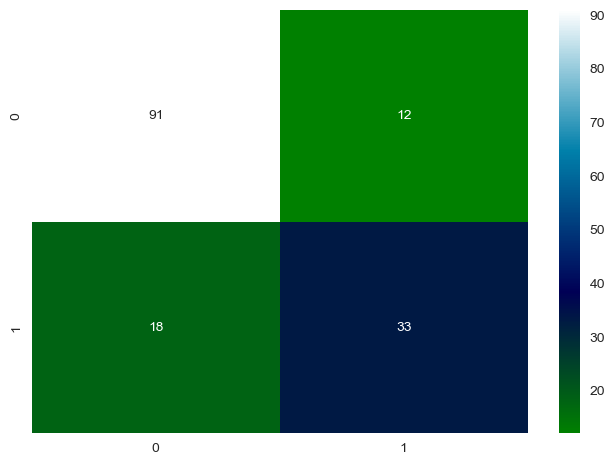

In [111]:
sns.heatmap(c,annot=True ,cmap="ocean")

In [112]:
rlf_scores = cross_val_score(rlf, x_train, y_train, scoring='accuracy'  , cv=10)
rlf_scores

array([0.79032258, 0.79032258, 0.74193548, 0.69354839, 0.70491803,
       0.73770492, 0.7704918 , 0.75409836, 0.80327869, 0.72131148])

# see alot of models 

In [113]:
from lazypredict.Supervised import LazyClassifier
lz = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = lz.fit(x_train, x_test, y_train, y_test)

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:02<00:00, 10.99it/s]

[LightGBM] [Info] Number of positive: 217, number of negative: 397
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353420 -> initscore=-0.604039
[LightGBM] [Info] Start training from score -0.604039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [114]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.81               0.77     0.77      0.81   
ExtraTreesClassifier               0.81               0.77     0.77      0.80   
XGBClassifier                      0.77               0.75     0.75      0.77   
RandomForestClassifier             0.79               0.75     0.75      0.79   
NuSVC                              0.81               0.75     0.75      0.80   
LGBMClassifier                     0.77               0.74     0.74      0.77   
SVC                                0.79               0.74     0.74      0.78   
SGDClassifier                      0.75               0.73     0.73      0.76   
LinearSVC                          0.78               0.73     0.73      0.77   
LogisticRegression                 0.78               0.73     0.73      0.77   
BaggingClassifier                  0.79               0.73     0.73      0.78   
PassiveAggressiveClassifier        0.71               0.73     0.73      0.72   
GaussianNB                         0.77               0.73     0.73      0.76   
NearestCentroid                    0.75               0.72     0.72      0.75   
CalibratedClassifierCV             0.77               0.72     0.72      0.77   
LinearDiscriminantAnalysis         0.77               0.72     0.72      0.77   
RidgeClassifierCV                  0.77               0.72     0.72      0.77   
RidgeClassifier                    0.77               0.72     0.72      0.77   
QuadraticDiscriminantAnalysis      0.76               0.71     0.71      0.75   
KNeighborsClassifier               0.75               0.69     0.69      0.74   
DecisionTreeClassifier             0.71               0.67     0.67      0.71   
LabelSpreading                     0.71               0.67     0.67      0.71   
LabelPropagation                   0.71               0.67     0.67      0.71   
BernoulliNB                        0.72               0.67     0.67      0.72   
Perceptron                         0.69               0.65     0.65      0.69   
ExtraTreeClassifier                0.69               0.64     0.64      0.68   
DummyClassifier                    0.67               0.50     0.50      0.54   

                               Time Taken  
Model                                      
AdaBoostClassifier                   0.31  
ExtraTreesClassifier                 0.47  
XGBClassifier                        0.14  
RandomForestClassifier               0.39  
NuSVC                                0.08  
LGBMClassifier                       0.10  
SVC                                  0.06  
SGDClassifier                        0.02  
LinearSVC                            0.06  
LogisticRegression                   0.04  
BaggingClassifier                    0.14  
PassiveAggressiveClassifier          0.03  
GaussianNB                           0.03  
NearestCentroid                      0.03  
CalibratedClassifierCV               0.17  
LinearDiscriminantAnalysis           0.03  
RidgeClassifierCV                    0.03  
RidgeClassifier                      0.03  
QuadraticDiscriminantAnalysis        0.03  
KNeighborsClassifier                 0.07  
DecisionTreeClassifier               0.04  
LabelSpreading                       0.10  
LabelPropagation                     0.10  
BernoulliNB                          0.02  
Perceptron                           0.02  
ExtraTreeClassifier                  0.03  
DummyClassifier                      0.03

In [88]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
stacking_clf = StackingClassifier(
 estimators=[
 ('lr', LogisticRegression(random_state=42)),
 ('rf', RandomForestClassifier(n_estimators=800,max_depth=10, random_state=42)),
 ('svc', LinearSVC(verbose=0, random_state=42))
 ],
 final_estimator=LinearSVC(random_state=43),
 cv=8 # number of cross-validation folds
)
stacking_clf.fit(x_train, y_train)

StackingClassifier(cv=8,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=800,
                                                       random_state=42)),
                               ('svc', LinearSVC(random_state=42))],
                   final_estimator=LinearSVC(random_state=43))

In [89]:
stacking_clf.score(x_test, y_test)

0.7922077922077922